# `**python analysis of supermarkets 's sales data**`



# **`1-Gather Data`**



In [118]:
import pandas as pd
supermarket_sales = pd.read_csv("/content/Python Project Data - Supermarket Sales (2).csv")
supermarket_sales.head()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


# `2-Assess`

we do the assessment of the data to check Quality and Tidness issues in the data

In [119]:
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [120]:
supermarket_sales.describe()

,Yangon,Naypyitaw,Mandalay,Quantity,Tax 5%,Total,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,997.000000,1003.000000,1006.000000
mean,0.338966,0.329026,0.332008,5.469185,15.479682,322.734689,7.056163
std,0.473594,0.470093,0.471168,3.014153,11.728320,245.865964,3.318751
min,0.000000,0.000000,0.000000,-8.000000,0.508500,10.678500,4.000000
25%,0.000000,0.000000,0.000000,3.000000,5.986500,123.789750,5.500000
50%,0.000000,0.000000,0.000000,5.000000,12.227500,254.016000,7.000000
75%,1.000000,1.000000,1.000000,8.000000,22.720500,471.009000,8.500000
max,1.000000,1.000000,1.000000,10.000000,49.650000,1042.650000,97.000000


**Quality issues **


*   Missing values in both  Total and Tax 5%
*   Outliers in Rating values (one value has a value with 97)


*   Invalid data with Quantity (negative numbers)
*    Invalid data with Date


*   Inconsistent data in Time ( one value has 8-30 pm )
*   Inconsistent data data in Unit price ( 5 values have USD with the price )










# **Tidiness issues**
the three columns Mandalay , Naypyitaw and Yangon must be in one column called city

we will create city column

# **`Cleaning`**

we take a copy of the original data

In [121]:
supermarket_sales_clean= supermarket_sales.copy()
supermarket_sales_clean.head()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


to see the null cells in both Total and Tax 5%

In [122]:
supermarket_sales_clean[supermarket_sales_clean['Total'].isnull()]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
14,829-34-3910,A,1,0,0,Normal,Male,Health and beauty,71.38,10,35.6900,NaN,3/29/2019,19:21,Cash,5.7
37,272-65-1806,A,1,0,0,Normal,Male,Electronic accessories,60.88,9,27.3960,NaN,1/15/2019,17:17,Ewallet,4.7


In [123]:
supermarket_sales_clean[supermarket_sales_clean['Tax 5%'].isnull()]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
8,665-32-9167,A,1,0,0,Normal,Male,Health and beauty,36.26,2,NaN,76.1460,1/10/2019,17:15,Credit card,7.2
86,362-58-8315,C,0,1,0,Normal,Male,Fashion accessories,76.52,5,NaN,401.7300,3/25/2019,10:23,Cash,9.9
92,873-51-0671,A,1,0,0,Member,Female,Sports and travel,21.98,7,NaN,161.5530,1/10/2019,16:42,Ewallet,5.1
97,871-39-9221,C,0,1,0,Normal,Female,Electronic accessories,12.45 USD,6,NaN,78.4350,2/9/2019,13:11,Cash,4.1
629,308-39-1707,A,1,0,0,Normal,Female,Fashion accessories,12.09 USD,-1,NaN,12.6945,1/26/2019,18:19,Credit card,8.2
830,237-44-6163,A,1,0,0,Normal,Male,Electronic accessories,10.56 USD,-8,NaN,88.7040,1/24/2019,17:43,Cash,7.6
881,115-38-7388,C,0,1,0,Member,Female,Fashion accessories,10.18 USD,-8,NaN,85.5120,3/30/2019,12:51,Credit card,9.5
903,865-41-9075,A,1,0,0,Normal,Male,Food and beverages,11.53 USD,-7,NaN,84.7455,1/28/2019,17:35,Cash,8.1


we will start with fixing the issue of negative numbers of Quantity

# **A- Define**
we have a negative numbers for Quantity within the data so we will replace this negative numbers with positive ones

In [124]:
supermarket_sales_clean.Quantity .sort_values()

,Quantity
830,-8
881,-8
903,-7
629,-1
734,1
...,...
909,10
446,10
457,10
752,10


**we  will replace the negative numbers with  positive ones **

# `B- code `

In [125]:
# replace negative numbers with positve ones
#supermarket_sales_clean['Quantity'] = supermarket_sales_clean['Quantity'].replace(negative, positive)

In [126]:
supermarket_sales_clean['Quantity'] = supermarket_sales_clean['Quantity'].replace(-8, 8)
supermarket_sales_clean['Quantity'] = supermarket_sales_clean['Quantity'].replace(-7, 7)
supermarket_sales_clean['Quantity'] = supermarket_sales_clean['Quantity'].replace(-1, 1)
supermarket_sales_clean.Quantity.sort_values()

,Quantity
215,1
100,1
835,1
833,1
600,1
...,...
146,10
687,10
546,10
491,10


# **`3-Test`**
we will this step we did for Quantity

In [127]:
supermarket_sales_clean.Quantity.sort_values()

,Quantity
215,1
100,1
835,1
833,1
600,1
...,...
146,10
687,10
546,10
491,10


**`Define`**
we have a string USD in the Unit Price column so we will fix this error

then we will remove USD in the 5 values in the Unit price column

In [128]:
print(supermarket_sales_clean.iloc[97])
print(supermarket_sales_clean.iloc[629])
print(supermarket_sales_clean.iloc[830])
print(supermarket_sales_clean.iloc[881])
print(supermarket_sales_clean.iloc[903])
# so we will fix the error bu removing USD


Invoice ID                  871-39-9221
Branch                                C
Yangon                                0
Naypyitaw                             1
Mandalay                              0
Customer type                    Normal
Gender                           Female
Product line     Electronic accessories
Unit price                    12.45 USD
Quantity                              6
Tax 5%                              NaN
Total                            78.435
Date                           2/9/2019
Time                              13:11
Payment                            Cash
Rating                              4.1
Name: 97, dtype: object
Invoice ID               308-39-1707
Branch                             A
Yangon                             1
Naypyitaw                          0
Mandalay                           0
Customer type                 Normal
Gender                        Female
Product line     Fashion accessories
Unit price                 12.09 USD
Qua

# **`Code **


In [129]:
#supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']=='element ID','Unit price']=unit price without USD


In [130]:
supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']=='865-41-9075','Unit price']=11.53
#print(supermarket_sales_clean.iloc[903])
supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']=='115-38-7388','Unit price']=10.18
#print(supermarket_sales_clean.iloc[881])
supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']=='237-44-6163','Unit price']=10.56
#print(supermarket_sales_clean.iloc[830])
supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']=='308-39-1707','Unit price']=12.09
#print(supermarket_sales_clean.iloc[629])
supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']==' 871-39-9221','Unit price']=12.45
#print(supermarket_sales_clean.iloc[629])


In [131]:
print(supermarket_sales_clean.iloc[97])
print(supermarket_sales_clean.iloc[629])
print(supermarket_sales_clean.iloc[830])
print(supermarket_sales_clean.iloc[881])
print(supermarket_sales_clean.iloc[903])

Invoice ID                  871-39-9221
Branch                                C
Yangon                                0
Naypyitaw                             1
Mandalay                              0
Customer type                    Normal
Gender                           Female
Product line     Electronic accessories
Unit price                    12.45 USD
Quantity                              6
Tax 5%                              NaN
Total                            78.435
Date                           2/9/2019
Time                              13:11
Payment                            Cash
Rating                              4.1
Name: 97, dtype: object
Invoice ID               308-39-1707
Branch                             A
Yangon                             1
Naypyitaw                          0
Mandalay                           0
Customer type                 Normal
Gender                        Female
Product line     Fashion accessories
Unit price                     12.09
Qua

In [132]:
# Convert the 'Unit price' column to numeric, handling potential errors
supermarket_sales_clean['Unit price'] = pd.to_numeric(supermarket_sales_clean['Unit price'], errors='coerce')

# Now, sort the values
supermarket_sales_clean['Unit price'].sort_values()

,Unit price
944,10.08
572,10.13
784,10.16
822,10.17
881,10.18
...,...
494,99.89
930,99.92
983,99.96
122,99.96


In [133]:
supermarket_sales_clean[supermarket_sales_clean['Unit price'].isnull()]

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
97,871-39-9221,C,0,1,0,Normal,Female,Electronic accessories,NaN,6,NaN,78.435,2/9/2019,13:11,Cash,4.1


In [134]:
supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']==' 871-39-9221','Unit price']=12.45
supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']==' 871-39-9221','Unit price']
print(supermarket_sales_clean.iloc[97])


Invoice ID                  871-39-9221
Branch                                C
Yangon                                0
Naypyitaw                             1
Mandalay                              0
Customer type                    Normal
Gender                           Female
Product line     Electronic accessories
Unit price                          NaN
Quantity                              6
Tax 5%                              NaN
Total                            78.435
Date                           2/9/2019
Time                              13:11
Payment                            Cash
Rating                              4.1
Name: 97, dtype: object


In [135]:
import numpy as np  # Import numpy

supermarket_sales_clean['Unit price'] = supermarket_sales_clean['Unit price'].replace(np.nan, 12.45)
# Use np.nan to represent NaN values
print(supermarket_sales_clean.iloc[97])

Invoice ID                  871-39-9221
Branch                                C
Yangon                                0
Naypyitaw                             1
Mandalay                              0
Customer type                    Normal
Gender                           Female
Product line     Electronic accessories
Unit price                        12.45
Quantity                              6
Tax 5%                              NaN
Total                            78.435
Date                           2/9/2019
Time                              13:11
Payment                            Cash
Rating                              4.1
Name: 97, dtype: object


# **check**
we will check the Unit price

In [136]:
print(supermarket_sales_clean.iloc[97])
print(supermarket_sales_clean.iloc[629])
print(supermarket_sales_clean.iloc[830])
print(supermarket_sales_clean.iloc[881])
print(supermarket_sales_clean.iloc[903])

Invoice ID                  871-39-9221
Branch                                C
Yangon                                0
Naypyitaw                             1
Mandalay                              0
Customer type                    Normal
Gender                           Female
Product line     Electronic accessories
Unit price                        12.45
Quantity                              6
Tax 5%                              NaN
Total                            78.435
Date                           2/9/2019
Time                              13:11
Payment                            Cash
Rating                              4.1
Name: 97, dtype: object
Invoice ID               308-39-1707
Branch                             A
Yangon                             1
Naypyitaw                          0
Mandalay                           0
Customer type                 Normal
Gender                        Female
Product line     Fashion accessories
Unit price                     12.09
Qua

In [137]:
supermarket_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   float64
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 125.9+ KB


# **Define **
we have nulls in both Total and Tax 5% so to avoid getting nulls in the two columns we will calculate Total then accordingly calculate Tax 5%

the two columns Total and Tax 5% have nulls so we will calculate Total then definie Tax 5% within it

# code

In [138]:
#supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']=='elementID','Total']=total number of it


In [139]:
#to exchange the NaN cell in the first cell we will calculate it
import numpy as np

supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']=='750-67-8428','Total']=548.9715
supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']=='829-34-3910','Total']=749.49
supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']==' 272-65-1806','Total']=575.316
supermarket_sales_clean.loc[supermarket_sales_clean['Invoice ID']==' 272-65-1806','Total']=575.316
supermarket_sales_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   float64
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1005 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 125.9+ KB


In [140]:
supermarket_sales_clean['Tax 5%'] = supermarket_sales_clean['Total'] - supermarket_sales_clean['Unit price'] * supermarket_sales_clean['Quantity']
supermarket_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   float64
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         1005 non-null   float64
 11  Total          1005 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 125.9+ KB


In [141]:
supermarket_sales_clean[supermarket_sales_clean['Tax 5%'].isnull()]
supermarket_sales_clean['Total'] = supermarket_sales_clean['Total'].fillna(78.435)


# **`check `**
we will check the nulls in column Total

In [142]:
supermarket_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   float64
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         1005 non-null   float64
 11  Total          1006 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 125.9+ KB


**`Define`**
we have nulls in the column Tax 5% so we will define Tax 5% as Total - "Unit price * Quantity "

# **code**

In [143]:
#supermarket_sales_clean['Tax 5%'] = supermarket_sales_clean['Total'] - supermarket_sales_clean['Unit price'] * supermarket_sales_clean['Quantity']


# `check`
then we will check nulls

In [144]:
supermarket_sales_clean['Tax 5%'] = supermarket_sales_clean['Total'] - supermarket_sales_clean['Unit price'] * supermarket_sales_clean['Quantity']
supermarket_sales_clean.info()

supermarket_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   float64
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         1006 non-null   float64
 11  Total          1006 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(4), int64(4), object(8)
memory usage: 125.9+ KB
<class 'pandas.core.frame.DataFrame'>

# **`Define`**
column Date don't match data time so we will make it matched

to fix the issue of Date in the data frame we format it

# `Code`

In [145]:
#supermarket_sales_clean['Date'] = pd.to_datetime(supermarket_sales_clean['Date'])


# ***Check***
after formatting we we check the results

In [146]:
#to fix the issue with the Date
supermarket_sales_clean['Date'] = pd.to_datetime(supermarket_sales_clean['Date'])
supermarket_sales_clean.info()
supermarket_sales_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1006 non-null   object        
 1   Branch         1006 non-null   object        
 2   Yangon         1006 non-null   int64         
 3   Naypyitaw      1006 non-null   int64         
 4   Mandalay       1006 non-null   int64         
 5   Customer type  1006 non-null   object        
 6   Gender         1006 non-null   object        
 7   Product line   1006 non-null   object        
 8   Unit price     1006 non-null   float64       
 9   Quantity       1006 non-null   int64         
 10  Tax 5%         1006 non-null   float64       
 11  Total          1006 non-null   float64       
 12  Date           1006 non-null   datetime64[ns]
 13  Time           1006 non-null   object        
 14  Payment        1006 non-null   object        
 15  Rating         1006 n

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3


**we will take a sample with a size 12 to ensure  **

In [147]:
 supermarket_sales_clean.sample(12)

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
721,678-79-0726,C,0,1,0,Member,Female,Sports and travel,90.63,9,40.7835,856.4535,2019-01-18,15:28,Cash,5.1
326,815-11-1168,A,1,0,0,Member,Male,Food and beverages,99.78,5,24.9450,523.8450,2019-03-09,19:09,Cash,5.4
440,450-28-2866,C,0,1,0,Member,Male,Food and beverages,17.44,5,4.3600,91.5600,2019-01-15,19:25,Cash,8.1
14,829-34-3910,A,1,0,0,Normal,Male,Health and beauty,71.38,10,35.6900,749.4900,2019-03-29,19:21,Cash,5.7
217,319-74-2561,A,1,0,0,Member,Female,Electronic accessories,94.64,3,14.1960,298.1160,2019-02-21,16:55,Cash,5.5
518,220-28-1851,A,1,0,0,Normal,Male,Home and lifestyle,34.73,2,3.4730,72.9330,2019-03-01,18:14,Ewallet,9.7
930,641-62-7288,B,0,0,1,Normal,Male,Home and lifestyle,99.92,6,29.9760,629.4960,2019-03-24,13:33,Ewallet,7.1
534,892-05-6689,A,1,0,0,Normal,Female,Home and lifestyle,28.32,5,7.0800,148.6800,2019-03-11,13:28,Ewallet,6.2
883,291-55-6563,A,1,0,0,Member,Female,Home and lifestyle,34.42,6,10.3260,216.8460,2019-03-30,12:45,Ewallet,7.5
441,394-30-3170,B,0,0,1,Member,Female,Sports and travel,88.43,8,35.3720,742.8120,2019-03-22,19:35,Credit card,4.3


In [148]:
print(supermarket_sales_clean.iloc[16])


Invoice ID               656-95-9349
Branch                             A
Yangon                             1
Naypyitaw                          0
Mandalay                           0
Customer type                 Normal
Gender                          Male
Product line       Health and beauty
Unit price                     68.93
Quantity                           7
Tax 5%                       24.1255
Total                       506.6355
Date             2019-03-11 00:00:00
Time                           11:03
Payment                  Credit card
Rating                           4.6
Name: 16, dtype: object


# `**Define **`
one elemant have a Time value 8-30 pm so we will replace it with 20:30

**then we will fix the issue of Time to match all the data frame **

# *`code`*

In [149]:
import pandas as pd

# to change the type of time to match all the data frame
supermarket_sales_clean['Time'] = pd.to_datetime(supermarket_sales['Time'], errors='coerce').dt.strftime('%H:%M')

print(supermarket_sales_clean[['Time']].head())


    Time
0  13:08
1  10:29
2  13:23
3    NaN
4  10:37


<ipython-input-149-a7e261adab4b>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  supermarket_sales_clean['Time'] = pd.to_datetime(supermarket_sales['Time'], errors='coerce').dt.strftime('%H:%M')


In [150]:
supermarket_sales_clean[supermarket_sales_clean['Time'].isnull()]


,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,23.288,489.048,2019-01-27,NaN,Ewallet,8.4


we got the value of" 8-30 pm  " as a null so we will fix it to 20:30

In [151]:
supermarket_sales_clean['Time'] = supermarket_sales_clean['Time'].fillna('20:30')
supermarket_sales_clean[supermarket_sales_clean['Time'].isnull()]
supermarket_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1006 non-null   object        
 1   Branch         1006 non-null   object        
 2   Yangon         1006 non-null   int64         
 3   Naypyitaw      1006 non-null   int64         
 4   Mandalay       1006 non-null   int64         
 5   Customer type  1006 non-null   object        
 6   Gender         1006 non-null   object        
 7   Product line   1006 non-null   object        
 8   Unit price     1006 non-null   float64       
 9   Quantity       1006 non-null   int64         
 10  Tax 5%         1006 non-null   float64       
 11  Total          1006 non-null   float64       
 12  Date           1006 non-null   datetime64[ns]
 13  Time           1006 non-null   object        
 14  Payment        1006 non-null   object        
 15  Rating         1006 n

In [152]:
supermarket_sales_clean.sample(20)

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
320,649-11-3678,C,0,1,0,Normal,Female,Food and beverages,22.93,9,10.3185,216.6885,2019-02-26,20:26,Cash,5.5
767,388-76-2555,B,0,0,1,Normal,Male,Sports and travel,13.69,6,4.1070,86.2470,2019-02-13,13:59,Cash,6.3
201,542-41-0513,B,0,0,1,Member,Female,Electronic accessories,57.49,4,11.4980,241.4580,2019-03-15,11:57,Cash,6.6
180,130-98-8941,C,0,1,0,Normal,Male,Fashion accessories,64.26,7,22.4910,472.3110,2019-02-09,10:00,Cash,5.7
425,198-84-7132,B,0,0,1,Member,Male,Fashion accessories,40.61,9,18.2745,383.7645,2019-01-02,13:40,Cash,7.0
60,285-68-5083,C,0,1,0,-,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,10.0
583,359-90-3665,B,0,0,1,Member,Female,Fashion accessories,18.08,4,3.6160,75.9360,2019-01-14,18:03,Credit card,9.5
544,841-18-8232,B,0,0,1,Normal,Female,Food and beverages,71.20,1,3.5600,74.7600,2019-01-05,20:40,Credit card,9.2
47,727-46-3608,B,0,0,1,-,Male,Food and beverages,20.01,9,9.0045,189.0945,2019-02-06,15:47,Ewallet,4.1
101,189-98-2939,C,0,1,0,Normal,Male,Fashion accessories,78.55,9,35.3475,742.2975,2019-03-01,13:22,Cash,7.2


# ***Define ***
one value has a more than 10 value so we will fix it from 97 to 9.7

the last issue that we will fix the outlier value of Rating

In [153]:
print(supermarket_sales_clean.iloc[157])


Invoice ID               307-85-2293
Branch                             B
Yangon                             0
Naypyitaw                          0
Mandalay                           1
Customer type                 Normal
Gender                          Male
Product line      Home and lifestyle
Unit price                     50.28
Quantity                           5
Tax 5%                         12.57
Total                         263.97
Date             2019-03-07 00:00:00
Time                           13:58
Payment                      Ewallet
Rating                          97.0
Name: 157, dtype: object


# ***code***

In [154]:
#supermarket_sales_clean['Rating'] = supermarket_sales_clean['Rating'].replace(97, 9.7)


In [155]:
supermarket_sales_clean['Rating'] = supermarket_sales_clean['Rating'].replace(97, 9.7)
print(supermarket_sales_clean.iloc[157])


Invoice ID               307-85-2293
Branch                             B
Yangon                             0
Naypyitaw                          0
Mandalay                           1
Customer type                 Normal
Gender                          Male
Product line      Home and lifestyle
Unit price                     50.28
Quantity                           5
Tax 5%                         12.57
Total                         263.97
Date             2019-03-07 00:00:00
Time                           13:58
Payment                      Ewallet
Rating                           9.7
Name: 157, dtype: object


In [156]:
supermarket_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1006 non-null   object        
 1   Branch         1006 non-null   object        
 2   Yangon         1006 non-null   int64         
 3   Naypyitaw      1006 non-null   int64         
 4   Mandalay       1006 non-null   int64         
 5   Customer type  1006 non-null   object        
 6   Gender         1006 non-null   object        
 7   Product line   1006 non-null   object        
 8   Unit price     1006 non-null   float64       
 9   Quantity       1006 non-null   int64         
 10  Tax 5%         1006 non-null   float64       
 11  Total          1006 non-null   float64       
 12  Date           1006 non-null   datetime64[ns]
 13  Time           1006 non-null   object        
 14  Payment        1006 non-null   object        
 15  Rating         1006 n

In [157]:
supermarket_sales_clean.describe()

,Yangon,Naypyitaw,Mandalay,Unit price,Quantity,Tax 5%,Total,Date,Rating
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006,1006.000000
mean,0.338966,0.329026,0.332008,55.699493,5.516899,14.917266,323.140944,2019-02-14 00:22:54.155069440,6.969384
min,0.000000,0.000000,0.000000,10.080000,1.000000,-469.485000,10.678500,2019-01-01 00:00:00,4.000000
25%,0.000000,0.000000,0.000000,32.975000,3.000000,5.864625,123.157125,2019-01-24 00:00:00,5.500000
50%,0.000000,0.000000,0.000000,55.420000,5.000000,12.123000,254.583000,2019-02-13 00:00:00,7.000000
75%,1.000000,1.000000,1.000000,77.945000,8.000000,22.475750,471.990750,2019-03-08 00:00:00,8.500000
max,1.000000,1.000000,1.000000,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,10.000000
std,0.473594,0.470093,0.471168,26.505795,2.925818,19.258809,246.091420,NaN,1.721592


In [173]:
supermarket_sales_clean=pd.melt(supermarket_sales_clean,id_vars=['Invoice ID','Branch','Customer type','Gender','Product line','Unit price','Quantity','Tax 5%','Total','Date','Time',
                                                                 'Payment','Rating'],var_name='city',value_name='city_value')

In [174]:
supermarket_sales_clean.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,city,city_value
0,750-67-8428,A,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1,Yangon,1
1,226-31-3081,C,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,9.6,Yangon,0
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4,Yangon,1
3,123-19-1176,A,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:30,Ewallet,8.4,Yangon,1
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3,Yangon,1


In [176]:
supermarket_sales_clean.sample(33)

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating,city,city_value
1616,421-95-9805,A,Normal,Female,Electronic accessories,28.96,1,1.4480,30.4080,2019-02-07,10:18,Credit card,6.2,Naypyitaw,0
2565,399-69-4630,C,Normal,Male,Electronic accessories,22.21,6,6.6630,139.9230,2019-03-07,10:23,Credit card,8.6,Mandalay,0
2507,632-32-4574,B,Normal,Male,Sports and travel,75.92,8,30.3680,637.7280,2019-03-20,14:14,Cash,5.5,Mandalay,1
744,345-68-9016,C,Member,Female,Sports and travel,31.67,8,12.6680,266.0280,2019-01-02,16:19,Credit card,5.6,Yangon,0
2231,790-29-1172,B,Normal,Female,Food and beverages,57.34,3,8.6010,180.6210,2019-03-10,18:59,Credit card,7.9,Mandalay,1
663,641-51-2661,C,Member,Female,Food and beverages,87.10,10,43.5500,914.5500,2019-02-12,14:45,Credit card,9.9,Yangon,0
106,628-34-3388,C,Normal,Male,Fashion accessories,27.38,6,8.2140,172.4940,2019-01-05,20:54,Credit card,7.9,Yangon,0
66,838-78-4295,C,-,Female,Health and beauty,33.47,2,3.3470,70.2870,2019-02-10,15:43,Ewallet,6.7,Yangon,0
1208,426-39-2418,C,Normal,Male,Electronic accessories,61.41,7,21.4935,451.3635,2019-01-14,10:02,Cash,9.8,Naypyitaw,1
2963,305-89-2768,B,Member,Female,Home and lifestyle,21.90,3,3.2850,68.9850,2019-01-09,18:43,Ewallet,4.7,Mandalay,1


# `**we can see now that the data is ready for the analysis **`

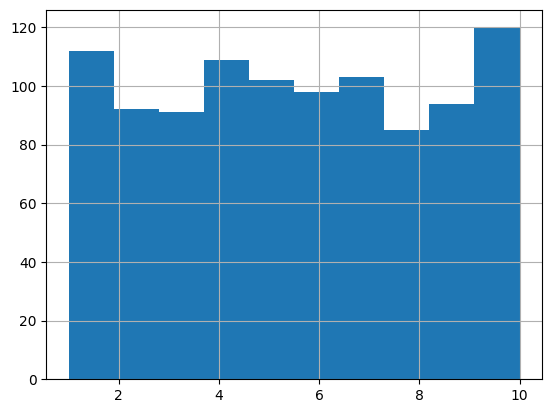

In [160]:
supermarket_sales_clean.Quantity.hist();

<Axes: ylabel='count'>

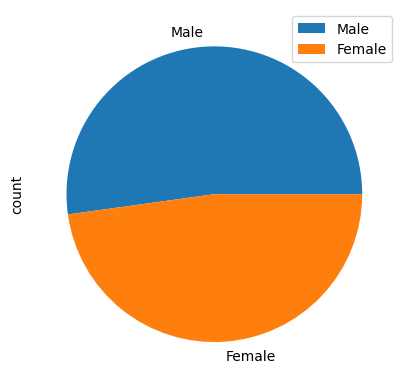

In [161]:
supermarket_sales_clean.Gender.value_counts().plot(kind='pie',legend='Gender')

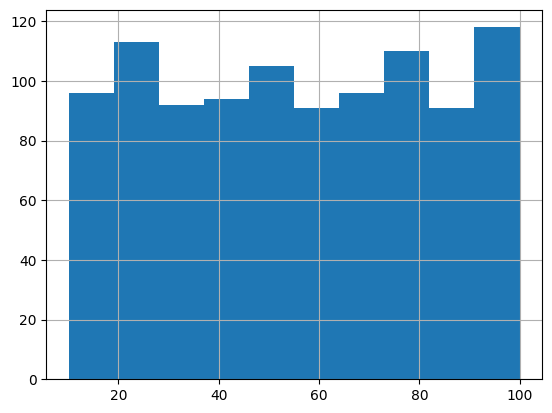

In [162]:
supermarket_sales_clean['Unit price'].hist();

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

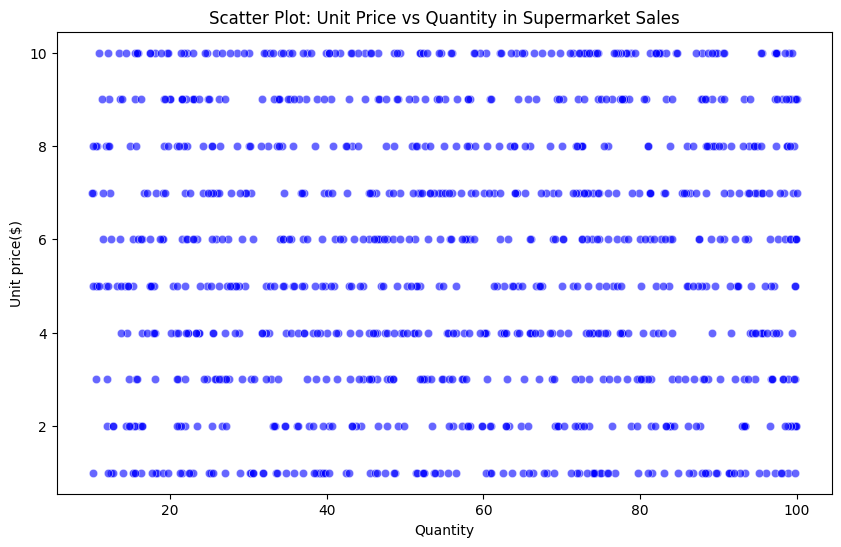

In [164]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=supermarket_sales_clean["Unit price"], y=supermarket_sales_clean["Quantity"], color="blue", alpha=0.6)

# Add labels and title
plt.xlabel("Quantity")
plt.ylabel("Unit price($)")
plt.title("Scatter Plot: Unit Price vs Quantity in Supermarket Sales")

# Show the plot
plt.show()

<ipython-input-165-a739ba398d3d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product line", y="Quantity", data=product_quantity, palette="viridis")


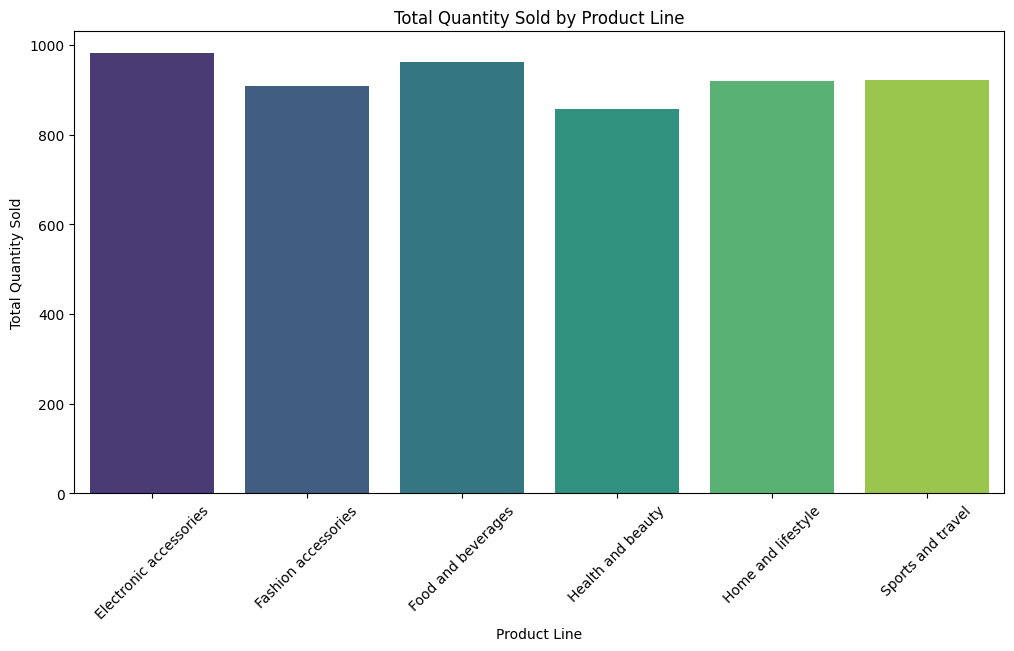

In [165]:
product_quantity = supermarket_sales_clean.groupby("Product line")["Quantity"].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12,6))
sns.barplot(x="Product line", y="Quantity", data=product_quantity, palette="viridis")

# Add labels and title
plt.xlabel("Product Line")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity Sold by Product Line")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
df = pd.read_csv("/content/Python Project Data - Supermarket Sales (2).csv", parse_dates=["Date"], index_col="Date")

# Sort data by date
df = df.sort_index()

# Display first few rows
print(df.head())


             Invoice ID Branch  Yangon  Naypyitaw  Mandalay Customer type  \
Date                                                                        
2019-01-01  891-01-7034      B       0          0         1        Normal   
2019-01-01  416-17-9926      A       1          0         0        Member   
2019-01-01  770-42-8960      B       0          0         1        Normal   
2019-01-01  182-52-7000      A       1          0         0        Member   
2019-01-01  530-90-9855      A       1          0         0        Member   

            Gender            Product line Unit price  Quantity  Tax 5%  \
Date                                                                      
2019-01-01  Female  Electronic accessories      74.71         6  22.413   
2019-01-01  Female  Electronic accessories      74.22        10  37.110   
2019-01-01    Male      Food and beverages      21.12         8   8.448   
2019-01-01  Female       Sports and travel      27.04         4   5.408   
2019-01-01

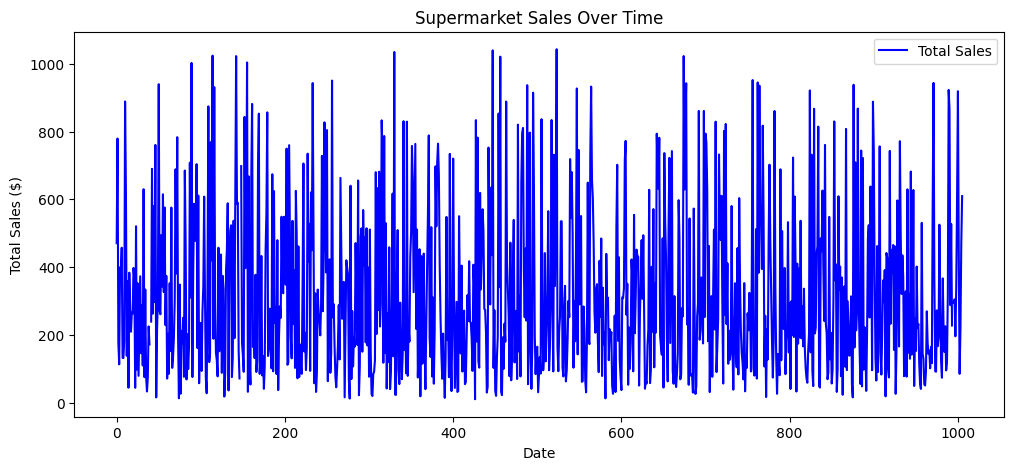

In [167]:
plt.figure(figsize=(12,5))
plt.plot(supermarket_sales_clean.index, df["Total"], label="Total Sales", color="blue")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Supermarket Sales Over Time")
plt.legend()
plt.show()


<ipython-input-168-1f011fef98c8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Payment", y="Quantity", data=payment_quantity, palette="coolwarm")


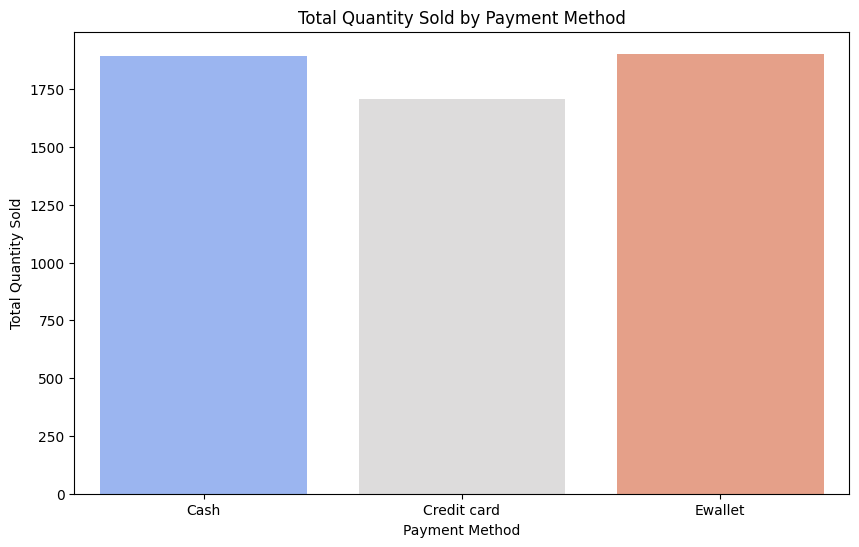

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Python Project Data - Supermarket Sales (2).csv")

# Group data by Payment method and sum Quantity
payment_quantity = df.groupby("Payment")["Quantity"].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Payment", y="Quantity", data=payment_quantity, palette="coolwarm")

# Add labels and title
plt.xlabel("Payment Method")
plt.ylabel("Total Quantity Sold")
plt.title("Total Quantity Sold by Payment Method")

# Show the plot
plt.show()
